In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as pg

#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#import graphviz

In [6]:
#warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv("Fraud_check.csv")

In [9]:
data.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [10]:
data.tail(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [12]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [15]:
print(data.shape)

(600, 6)


In [18]:
print(data.ndim)
print(data.axes[0])
print(data.axes[1])
print(data.columns)
print(data.nunique)

2
RangeIndex(start=0, stop=600, step=1)
Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')
Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')
<bound method DataFrame.nunique of     Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598      

In [23]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [24]:
print(data.isna().sum())

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64


In [25]:
data[data.duplicated()].shape

(0, 6)

In [28]:
data = data.rename({'Marital.Status':'Marital_S'},axis=1)

In [29]:
col_names = ['Undergrad', 'Marital_S','Urban']

In [33]:
for val in col_names:()
print(data[val].value_counts())

Urban
YES    302
NO     298
Name: count, dtype: int64


In [44]:
conditions = (data['Taxable.Income']<=30000) , (data['Taxable.Income'] > 30000)

In [45]:
choices = ('Risky', 'Good')

In [46]:
data['Taxable.Income'] = np.select(conditions, choices)

In [48]:
print(data.head(20))

   Undergrad Marital_S Taxable.Income  City.Population  Work.Experience Urban
0         NO    Single           Good            50047               10   YES
1        YES  Divorced           Good           134075               18   YES
2         NO   Married           Good           160205               30   YES
3        YES    Single           Good           193264               15   YES
4         NO   Married           Good            27533               28    NO
5         NO  Divorced           Good           116382                0    NO
6         NO  Divorced           Good            80890                8   YES
7        YES    Single           Good           131253                3   YES
8         NO    Single           Good           102481               12   YES
9        YES  Divorced           Good           155482                4   YES
10        NO    Single          Risky           102602               19   YES
11        NO    Single           Good            94875          

In [51]:
label_data = data['Taxable.Income'].value_counts()

In [52]:
expl = (0.1,0.1)

In [53]:
fig = plt.figure(figsize=(15,9))

<Figure size 1500x900 with 0 Axes>

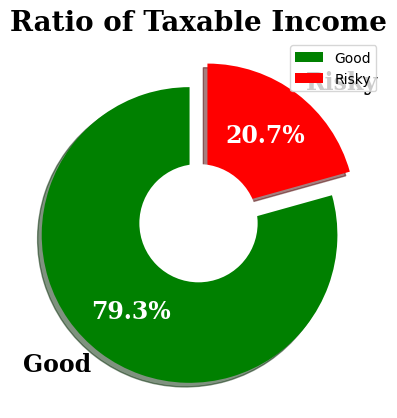

In [105]:
patches,text, pcts = plt.pie(label_data,labels=label_data.index, colors = ['green','red'], pctdistance = 0.65,shadow= True, startangle = 90, explode = expl, autopct = '%1.1f%%', textprops = {'fontsize':17,'color':'black','weight':'bold','family':'serif'})
plt.setp(pcts,color='white') 
hfont = {'weight':'bold','family':'serif'}
plt.title('Ratio of Taxable Income' , size=20,**hfont)
centre_circle=plt.Circle((0,0),0.40,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(['Good','Risky'],loc="upper right")
plt.show()


In [71]:
print(label_data['Good']/np.sum(label_data)*100, '%')
print(label_data['Risky']/np.sum(label_data)*100,'%')

79.33333333333333 %
20.666666666666668 %


In [106]:
continue_col = ['City.Population', 'Work.Experience']
category_col = ['Undergrad_YES','Marital_S', 'Urban_YES']

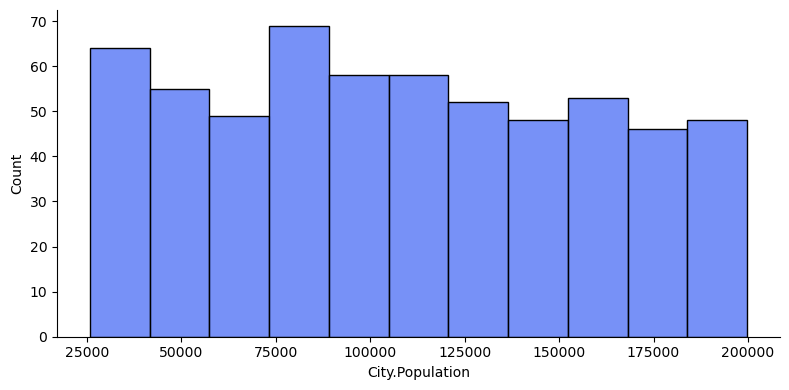

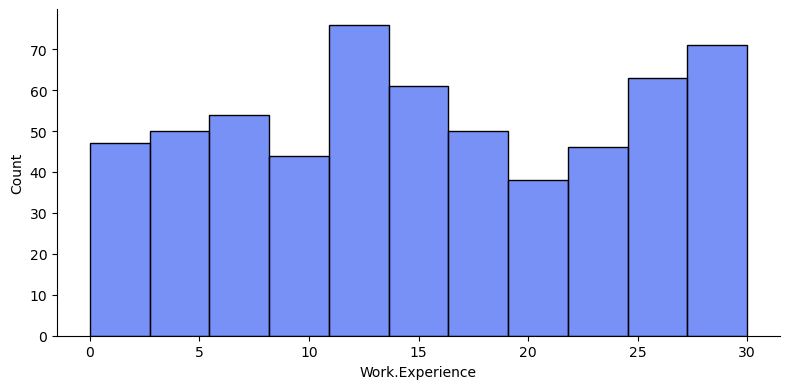

In [107]:
for val in continue_col:
    sns.displot(data=data,x=val, height = 4, aspect = 2, color='#496DF5')
plt.show()

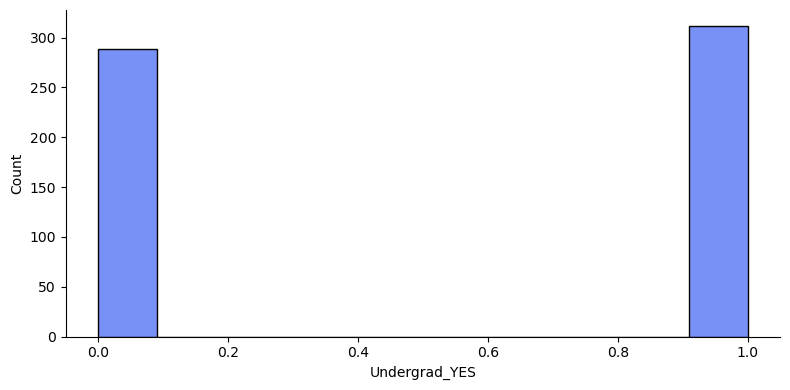

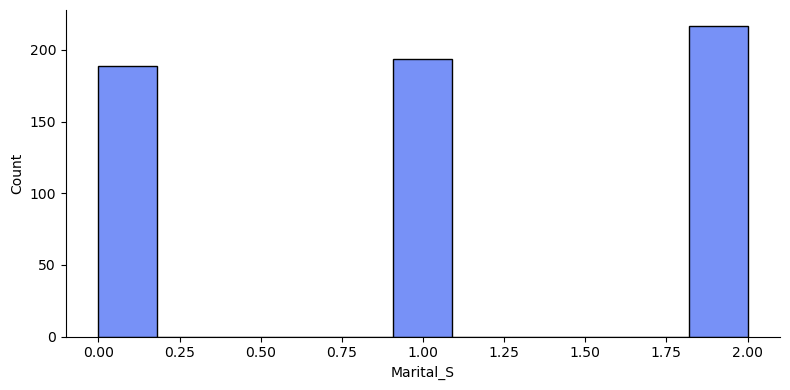

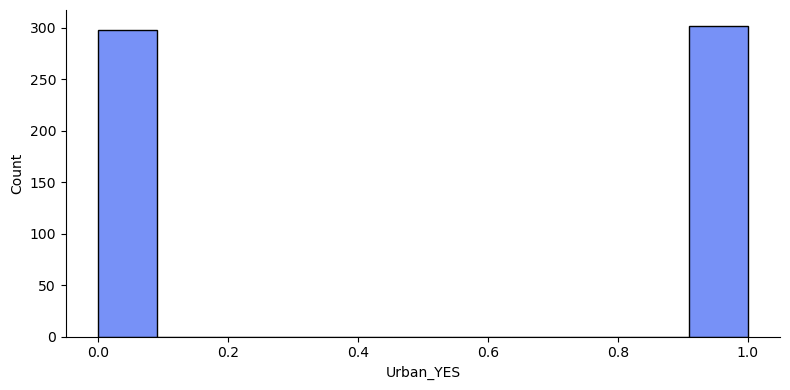

In [108]:
for val in category_col:
    sns.displot(data=data,x=val, height = 4, aspect = 2, color='#496DF5')
plt.show()

In [83]:
data=pd.get_dummies(data,columns=['Urban','Undergrad'],drop_first=True)

In [84]:
print(data.head(5))

  Marital_S Taxable.Income  City.Population  Work.Experience  Urban_YES  \
0    Single           Good            50047               10       True   
1  Divorced           Good           134075               18       True   
2   Married           Good           160205               30       True   
3    Single           Good           193264               15       True   
4   Married           Good            27533               28      False   

   Undergrad_YES  
0          False  
1           True  
2          False  
3           True  
4          False  


In [86]:
from sklearn.preprocessing import LabelEncoder

In [97]:
string_columns = ['Marital_S', 'Taxable.Income']

In [98]:
number = LabelEncoder()

In [99]:
for i in string_columns:
    data[i] = number.fit_transform(data[i])

In [100]:
print(data.head())
print(data.tail())

   Marital_S  Taxable.Income  City.Population  Work.Experience  Urban_YES  \
0          2               0            50047               10       True   
1          0               0           134075               18       True   
2          1               0           160205               30       True   
3          2               0           193264               15       True   
4          1               0            27533               28      False   

   Undergrad_YES  
0          False  
1           True  
2          False  
3           True  
4          False  
     Marital_S  Taxable.Income  City.Population  Work.Experience  Urban_YES  \
595          0               0            39492                7       True   
596          0               0            55369                2       True   
597          0               0           154058                0       True   
598          1               0           180083               17      False   
599          0              

In [109]:
fig = plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

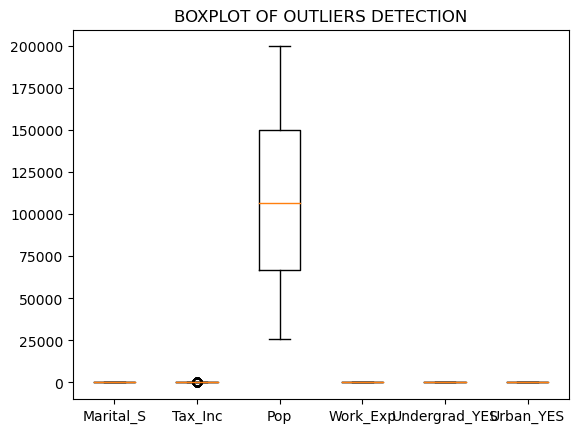

In [122]:
plt.boxplot(data,labels=['Marital_S','Tax_Inc','Pop','Work_Exp','Undergrad_YES','Urban_YES'])
plt.title('BOXPLOT OF OUTLIERS DETECTION')
plt.show()

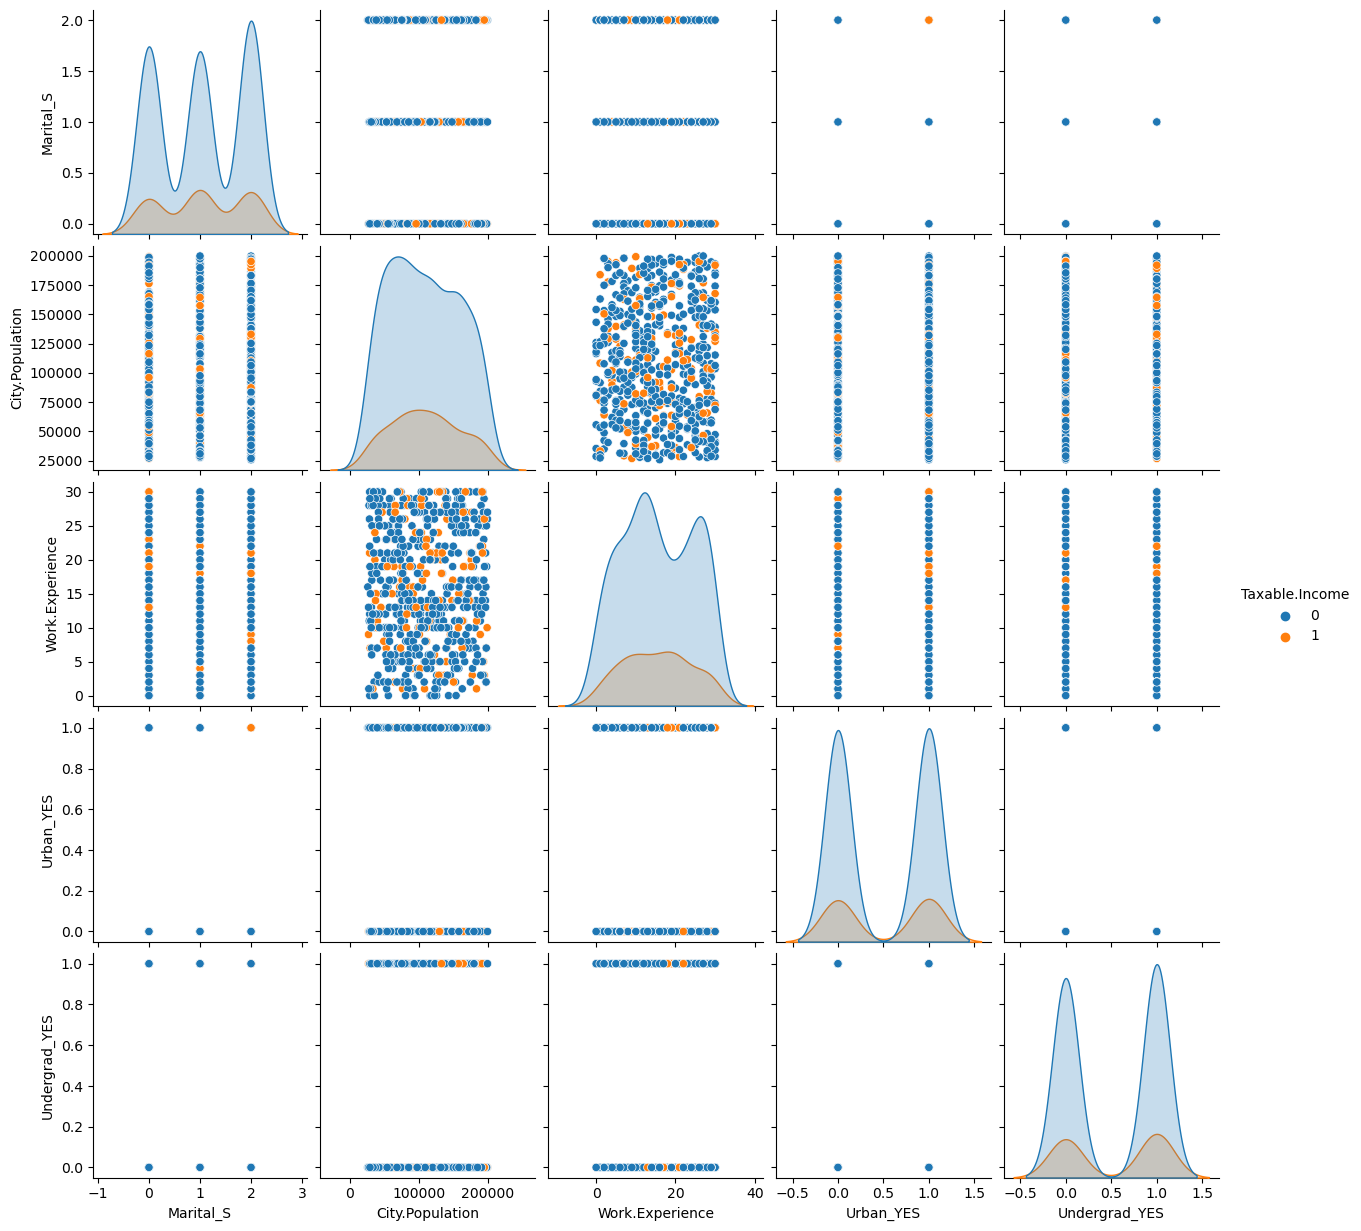

In [124]:
sns.pairplot(data=data,hue='Taxable.Income')
plt.show()

In [125]:
fig = plt.figure(figsize=(12,10))

<Figure size 1200x1000 with 0 Axes>

<Axes: >

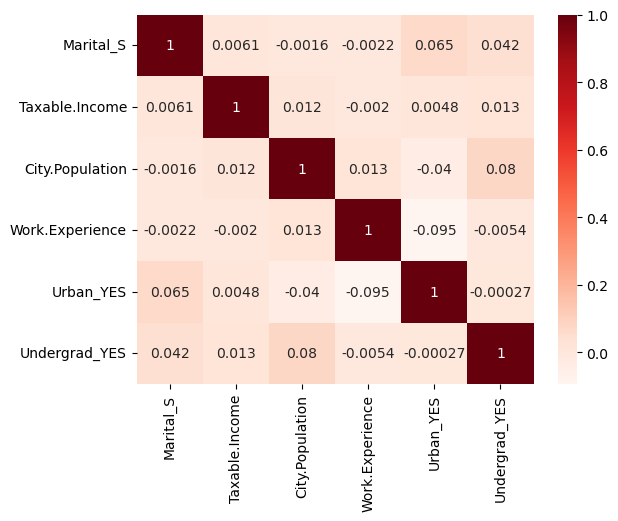

In [126]:
sns.heatmap(data.corr(),annot=True,cmap=plt.cm.Reds)